# Определение тарифного плана

Описание проекта

Клиентам предлагают 2 тарифных плана, чтобы скорректировать рекламный бюджет нужно понять какой тариф приносит больше денег.
Данные 500 пользователей : кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Откроем файл с данными и изучим общую информацию

Путь к файлам:
- /datasets/calls.csv Таблица calls (информация о звонках):
- /datasets/internet.csv Таблица internet (информация об интернет-сессиях):
- /datasets/messages.csv Таблица messages (информация о сообщениях):
- /datasets/tariffs.csv Таблица tariffs (информация о тарифах):
- /datasets/users.csv Таблица users (информация о пользователях)

In [402]:
#импорт библиотек
import pandas as pd 
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st

In [403]:
#создание DataFrame из файлов csv
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv') 

### Таблица **calls** (информация о звонках):
Изучим общую информацию 

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [404]:
calls.info() #сводная информация по таблице calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [405]:
calls.head() #первые 5столбцов по таблице calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


#### Вывод по таблице calls:
формат call_date (calls) нужно изменить на формат даты. Пропусков нет. Число строк 202 607.

### Таблица internet (информация об интернет-сессиях):
Изучим общую информацию

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [406]:
internet.info() #сводная информация по таблице internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [407]:
internet.head() #первые 5столбцов по таблице internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


#### Вывод по таблице internet :
формат session_date (internet) нужно изменить на формат даты. Пропусков нет. Число строк 149 396.

### Таблица messages (информация о сообщениях)
Изучим общую информацию 

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [408]:
messages.info() #сводная информация по таблице messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [409]:
messages.head() #первые 5столбцов по таблице messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


#### Вывод по таблице messages :
формат message_date (messages) нужно изменить на формат даты. Пропусков нет. Число строк 123 036.

### Таблица tariffs (информация о тарифах):
Изучим общую информацию

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [410]:
tariffs.info() #сводная информация по таблице tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [411]:
tariffs.head() #первые 5столбцов по таблице tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод по таблице tariffs:
Пропусков нет. Число строк 2.

### Таблица users (информация о пользователях):
Изучим общую информацию 

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [412]:
users.info() #сводная информация по таблице users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [413]:
users.head() #первые 5столбцов по таблице users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [414]:
users['tariff'].value_counts() #распредление пользователей по тарифу

smart    351
ultra    149
Name: tariff, dtype: int64

#### Вывод по таблице users :
Формат reg_date (users) нужно изменить на формат даты. Столбец churn_date — содержит информацию о дате прекращения пользования тарифом, возможно таких пользователей нужно будет исключить из анализа. Число строк 500 по числу уникальных пользователей. Число пользователей smart вдвое больше чем ultra.

###  Вывод:
- **calls:** формат call_date (calls) нужно изменить на формат даты. Пропусков нет. Число строк 202 607.
- **internet:** формат session_date (internet) нужно изменить на формат даты. Пропусков нет. Число строк 149 396.
- **messages:** формат message_date (messages) нужно изменить на формат даты. Пропусков нет. Число строк 123 036.
- **tariffs:** Пропусков нет. Число строк 2.
- **users:** формат reg_date (users) нужно изменить на формат даты. Столбец churn_date — содержит информацию о дате прекращения пользования тарифом, предварительно данные за месяц отключения для таких пользователей нужно удалить. Число строк 500 по числу уникальных пользователей.


## Подготовим данные


### Приведем данные к нужным типам

- Найдем и исправим ошибки в данных.

#### Изменим формат столбцов даты на формат datetime

- call_date (calls)
- session_date (internet)
- message_date (messages)
- reg_date (users)

In [415]:
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

### Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### количество сделанных звонков и израсходованных минут разговора по месяцам;
Добавим столбец месяца,

Затем создадим сводную таблицу и отразим результат.

In [416]:
calls['month'] = calls['call_date'].dt.month #добавим столбец месяц
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


**Примечание:**

Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [417]:
calls['duration'] = np.ceil(calls['duration']) #выполняем округление вверх до минут для каждого звонка
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [418]:
#создадим сводную таблицу с числом звонков и суммарной длительностью за месяц
calls_pivot = calls.groupby(['user_id','month']).agg(cnt_calls=('duration','count'),
                                                      sum_calls=('duration','sum'))
calls_pivot.head()

cnt_calls  sum_calls
user_id month                      
1000    5             22      159.0
        6             43      172.0
        7             47      340.0
        8             52      408.0
        9             58      466.0

#### количество отправленных сообщений по месяцам;
Добавим столбец месяца,

Затем создадим сводную таблицу и отразим результат.

In [419]:
messages['month'] = messages['message_date'].dt.month #добавим столбец месяц
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [420]:
#создадим сводную таблицу с числом сообщений за месяц
messages_pivot = messages.groupby(['user_id','month']).agg(cnt_message=('message_date','count'))
messages_pivot.head()

cnt_message
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57

#### объем израсходованного интернет-трафика по месяцам;
Добавим столбец месяца,

Затем создадим сводную таблицу и отразим результат.

In [421]:
internet['month'] = internet['session_date'].dt.month #добавим столбец месяц
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [422]:
#создадим сводную таблицу с числом сообщений за месяц
internet_pivot = internet.groupby(['user_id','month']).agg(sum_mb=('mb_used','sum'))
internet_pivot.head()

sum_mb
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

#### помесячную выручку с каждого пользователя 


Объединим данные сводных таблиц в одну новую сводную таблицу `revenue`

In [423]:
revenue = calls_pivot.merge(internet_pivot, on=['user_id','month'], how='outer') # добавим данные calls_pivot и internet_pivot
revenue = revenue.merge(messages_pivot, on=['user_id','month'], how='outer') # добавим данные messages_pivot

revenue.head()

cnt_calls  sum_calls    sum_mb  cnt_message
user_id month                                             
1000    5           22.0      159.0   2253.49         22.0
        6           43.0      172.0  23233.77         60.0
        7           47.0      340.0  14003.64         75.0
        8           52.0      408.0  14055.93         81.0
        9           58.0      466.0  14568.91         57.0

Преобразуем сводную таблицу в DataFrame и переименуем для удобства столбцы



In [424]:
revenue = revenue.merge(users[['user_id','tariff','city']], on=['user_id'], how='left') # добавим название тарифа

# переименуем столбец DataFrame
revenue.rename(columns = { "tariff":"tariff_name"},inplace = True)
revenue.head()

,user_id,cnt_calls,sum_calls,sum_mb,cnt_message,tariff_name,city
0,1000,22.0,159.0,2253.49,22.0,ultra,Краснодар
1,1000,43.0,172.0,23233.77,60.0,ultra,Краснодар
2,1000,47.0,340.0,14003.64,75.0,ultra,Краснодар
3,1000,52.0,408.0,14055.93,81.0,ultra,Краснодар
4,1000,58.0,466.0,14568.91,57.0,ultra,Краснодар


In [425]:
revenue = revenue.merge(tariffs, on=['tariff_name'], how='left') #добавим параметры тарифа
revenue = revenue.fillna(0) #заполним отсутвующие данные по трафику "0"
display(revenue)
tariffs.head()

,user_id,cnt_calls,sum_calls,sum_mb,cnt_message,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.0,159.0,2253.49,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,43.0,172.0,23233.77,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,47.0,340.0,14003.64,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,52.0,408.0,14055.93,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,58.0,466.0,14568.91,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.0,0.0,11050.56,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,0.0,0.0,17206.30,32.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,0.0,0.0,19559.44,21.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,0.0,0.0,17491.56,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному планую.

In [426]:
# фунция расчета помесячной выручки с каждого пользователя:
def revenue_calc(row):
    cost = row['rub_monthly_fee'] # абонентская плата
    if row['sum_calls'] > row['minutes_included']:
        cost += (row['sum_calls'] - row['minutes_included']) * row['rub_per_minute'] # добавляем цену минут сверх лимита
    if row['sum_mb'] > row['mb_per_month_included']:
        cost += math.ceil((row['sum_mb'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb'] # добавляем цену GB сверх лимита с округлением до 1GB
    if row['cnt_message'] > row['messages_included']:
        cost += (row['cnt_message'] - row['messages_included']) * row['rub_per_message'] # добавляем цену сообщений сверх лимита        
    return cost

revenue['revenue_month'] = revenue.apply(revenue_calc, axis=1) # передадим в функцию всю строку для расчета выручки за месяц.
revenue

,user_id,cnt_calls,sum_calls,sum_mb,cnt_message,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_month
0,1000,22.0,159.0,2253.49,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
1,1000,43.0,172.0,23233.77,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
2,1000,47.0,340.0,14003.64,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52.0,408.0,14055.93,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
4,1000,58.0,466.0,14568.91,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.0,0.0,11050.56,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,550.0
3210,1489,0.0,0.0,17206.30,32.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,950.0
3211,1489,0.0,0.0,19559.44,21.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1550.0
3212,1489,0.0,0.0,17491.56,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1150.0


## **Шаг 3**. Проанализируем данные 

Опишем поведение клиентов оператора, исходя из выборки.

### Сколько минут разговора, сообщений и трафика требуется пользователям каждого тарифа в месяц


#### Посчитаем среднее количество, дисперсию и стандартное отклонение.

Создадим сводную таблицу с необходимыми параметрами.

In [427]:
revenue_pivot = pd.pivot_table(revenue, index=['tariff_name'],
                               values=['cnt_calls','sum_calls','sum_mb','cnt_message'],
                               aggfunc={'cnt_calls':'count',
                                        'sum_calls':['mean','std','var'],
                                        'sum_mb':['mean','std','var'],
                                        'cnt_message':['mean','std','var']})
revenue_pivot.astype(int)

cnt_calls cnt_message           sum_calls              sum_mb  \
                count        mean std   var      mean  std     var   mean   
tariff_name                                                                 
smart            2229          33  28   796       417  190   36219  16208   
ultra             985          49  47  2285       526  317  100873  19468   

                               
               std        var  
tariff_name                    
smart         5870   34462496  
ultra        10087  101751013

##### Вывод : 
Средние значения отличаются не так сильно как параметры тарифов, однако стандартное отклонение в тарифе ultra больше.

#### Построим гистограммы. Опишим распределения.

##### Гистограммы минут разговора 

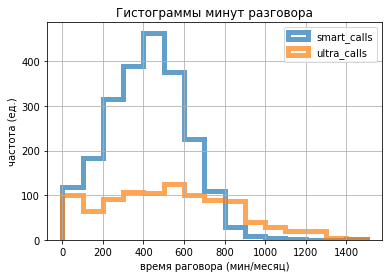

In [428]:
ax = revenue.query('tariff_name == "smart"').plot(kind='hist', y='sum_calls', histtype='step',
                        range=(0, 1500), bins=15,linewidth=5, alpha=0.7, label='smart_calls')
revenue.query('tariff_name == "ultra"').plot(kind='hist', y='sum_calls', histtype='step',
                        range=(0, 1500), bins=15, linewidth=5, alpha=0.7, label='ultra_calls', ax=ax, grid=True, legend=True)

ax.set_xlabel('время раговора (мин/месяц)') #добавим подпись к оси (X).
ax.set_ylabel('частота (ед.)') #добавим подпись к оси (Y).
plt.title('Гистограммы минут разговора') #добавим подпись к графику.

plt.show() # даём команду отобразить гистограмму

###### Вывод: 
Гистограммы минут разговора для тарифа smart и ultra  имеет ассиметричность с отрицательной скошенностью (скошенностью влево).

##### Гистограммы сообщений

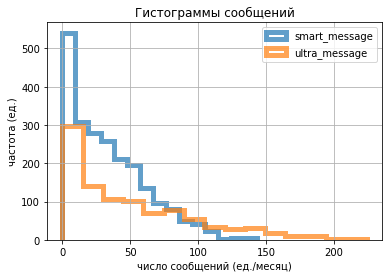

In [429]:
ax = revenue.query('tariff_name == "smart"').plot(kind='hist', y='cnt_message', histtype='step',
                         bins=15,linewidth=5, alpha=0.7, label='smart_message')
revenue.query('tariff_name == "ultra"').plot(kind='hist', y='cnt_message', histtype='step',
                         bins=15, linewidth=5, alpha=0.7, label='ultra_message', ax=ax, grid=True, legend=True)

ax.set_xlabel('число сообщений (ед./месяц)') #добавим подпись к оси (X).
ax.set_ylabel('частота (ед.)') #добавим подпись к оси (Y).
plt.title('Гистограммы сообщений') #добавим подпись к графику.

plt.show() # даём команду отобразить гистограмму

###### Вывод: 
Гистограммы числа сообщений для тарифа smart и ultra имеют **Распределение Пуассона —** число событий в единицу времени, если они в среднем происходят с измеренной частотой.

##### Гистограммы объёма интернет-трафика

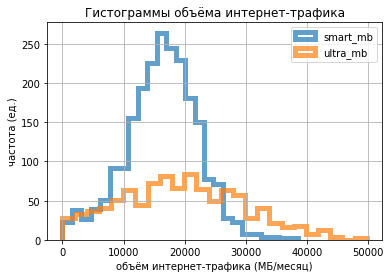

In [430]:
ax = revenue.query('tariff_name == "smart"').plot(kind='hist', y='sum_mb', histtype='step',
                         bins=25,linewidth=5, alpha=0.7, label='smart_mb')
revenue.query('tariff_name == "ultra"').plot(kind='hist', y='sum_mb', histtype='step',
                         bins=25, linewidth=5, alpha=0.7, label='ultra_mb', ax=ax, grid=True, legend=True)

ax.set_xlabel('объём интернет-трафика (МБ/месяц)') #добавим подпись к оси (X).
ax.set_ylabel('частота (ед.)') #добавим подпись к оси (Y).
plt.title('Гистограммы объёма интернет-трафика') #добавим подпись к графику.

plt.show() # даём команду отобразить гистограмму

###### Вывод: 
Гистограммы объёма интернет-трафика для тарифа smart и ultra  близкое к нормальному распределение. Нормальное распределение — чаще всего встречается среднее значение и близкие к нему, а крайние значения встречаются довольно редко

## Шаг 4. Проверим гипотезы


### средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- `Нулевая гипотеза` : «разницы нет, исследуемые параметры равны».
- `Альтернативная гипотеза` : средняя выручка пользователей тарифа "Ультра" выше чем пользователей "Смарт".

Пороговое значение вероятности получить наблюдаемый результат при условии, что нулевая гипотеза верна выберем равным `5%`.

In [431]:
alpha = .05 # пороговое значение вероятности получить наблюдаемый результат при условии, что нулевая гипотеза верна.

results = st.ttest_ind(
    revenue.query('tariff_name == "smart"')['revenue_month'],
    revenue.query('tariff_name == "ultra"')['revenue_month'],
    equal_var=False)
print('p-значение: ', results.pvalue/2)

if (results.pvalue/2 < alpha and
    revenue.query('tariff_name == "smart"')['revenue_month'].mean() <
    revenue.query('tariff_name == "ultra"')['revenue_month'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('средняя выручка пользователя тарифа "Смарт":', revenue.query('tariff_name == "smart"')['revenue_month'].mean() )
print('средняя выручка пользователя тарифа "Ультра":', revenue.query('tariff_name == "ultra"')['revenue_month'].mean() )

p-значение:  2.1303156965538042e-250
Отвергаем нулевую гипотезу
средняя выручка пользователя тарифа "Смарт": 1289.9735307312696
средняя выручка пользователя тарифа "Ультра": 2070.1522842639592


#### Вывод: 
вероятность получить наблюдаемый результат при условии что нулевая гипотеза верна очень мала (250 знаков после запятой). Поэтому гипотезу о равенстве средней выручки отвергаем в пользу альтернативной гипотезы средняя выручка пользователей тарифа "Ультра" выше чем пользователей "Смарт".

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- `Нулевая гипотеза` : «разницы нет, исследуемые параметры равны».
- `Альтернативная гипотеза` : «исследуемые параметры не равны».

Пороговое значение вероятности получить наблюдаемый результат при условии, что нулевая гипотеза верна выберем равным 5%.

In [432]:
alpha = .05 # пороговое значение вероятности получить наблюдаемый результат при условии, что нулевая гипотеза верна.

results = st.ttest_ind(
    revenue.query('city == "Москва"')['revenue_month'],
    revenue.query('city != "Москва"')['revenue_month'])
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('средняя выручка пользователя в г. Москва:', revenue.query('city == "Москва"')['revenue_month'].mean() )
print('средняя выручка пользователя в регионах:', revenue.query('city != "Москва"')['revenue_month'].mean() )

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу
средняя выручка пользователя в г. Москва: 1546.7135842880523
средняя выручка пользователя в регионах: 1524.9362274298885


###### Вывод: 
вероятность получить наблюдаемый результат при условии что нулевая гипотеза верна намного выше порога, поэтому гипотезу не можем отвергать.

### Пояснение:
Исходя из задачи `Нулевая гипотеза` была выбрана такая: «разницы нет, выручки равны».

`Альтернативная гипотеза` для ставнения тарифов выбрана как средняя выручка пользователей тарифа "Ультра" выше чем пользователей "Смарт".
`Альтернативная гипотеза` для сравнения пользователей Москвы и регионов выбрана «исследуемые параметры не равны», поскольку нам не важно больше выручка или меньше.

В обоих случаях была использована `Гипотеза о равенстве средних для независимых выборок`, поскольку в выборках используются разные тарифы и города. Зависимые же выборки как правило возникают, когда речь идет об одной группе испытуемых до и после  воздействия.

## Общий вывод
На основании проверки гипотезы по выборке из 500 клиентов, можем сделать вывод что выручка пользователя "Ультра" выше выручки пользователся тарифа "Смарт" 2072.4 руб. против 1303.3 руб. При планировании рекламного бюджета также нужно учесть то что потенциальных пользователей тарифа "Смарт" может быть почти в двое выше как в нашей выборке, а в этом случае выручка от "Смарт" может превысить выручку тарифа "Ультра".

Выручка пользователей в регионах сопоставима с пользователями в г. Москва. Поэтому планирование рекламного бюджета можно выполнить пропорционально числу потенциальных пользователей.

Пользователи тарифа "Ультра" также выгоднее тем, что потребляют сравнимые с пользователями тарифа "Смарт" объемы минут, МБ и смс, но при этом приносят почти вдвое больше выручки.


